In [1]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter

In [2]:
def Get_lent(matrix_name):
    folder = "1_FASTA_matrix_initial/"
    fasta_matrix = f"{folder}{matrix_name}.fasta"
        
    with open(fasta_matrix, "r") as file:
        sequences = list(SeqIO.parse(file, "fasta"))
            
    upper_list = []
    for seq_record in sequences:
        sequence = seq_record.seq
        description = seq_record.description
        
        uppercase_count = 0
        if "(+)" in description:
            for char in sequence:
                if char.isupper():
                    uppercase_count += 1
            if uppercase_count != 0:
                upper_list.append(uppercase_count)
                
        elif "(-)" in description:
            pass
        
        else:
            for char in sequence:
                if char.isupper():
                    uppercase_count += 1
            if uppercase_count != 0:
                upper_list.append(uppercase_count)
                
    element_counts = Counter(upper_list)
    most_common_element, highest_frequency = element_counts.most_common(1)[0]
    result = (matrix_name, most_common_element)
    
    return result

In [3]:
df = pd.read_csv("success_download.csv")
# SELEX, ChIP-seq, COMPILED, High-throughput SELEX SAGE, bacterial 1-hybrid, ChIP-chip, HT-SELEX, NA
# SELEX, High-throughput SELEX SAGE, HT-SELEX
selex_result = []
selex_plot_data = []

SELEX_rows = df[df['Data type'] == 'SELEX']
for id in SELEX_rows['ID']:
    result = Get_lent(id)
    selex_result.append(result)
    selex_plot_data.append(result[1])

SELEX_SAGE_rows = df[df['Data type'] == 'High-throughput SELEX SAGE']
for id in SELEX_SAGE_rows['ID']:
    result = Get_lent(id)
    selex_result.append(result)
    selex_plot_data.append(result[1])
    
HT_SELEX_rows = df[df['Data type'] == 'HT-SELEX']
for id in HT_SELEX_rows['ID']:
    result = Get_lent(id)
    selex_result.append(result)
    #selex_plot_data.append(result[1])
    selex_plot_data.append(math.ceil(result[1]))
    
# check the correct or not
if len(SELEX_rows)+len(SELEX_SAGE_rows)+len(HT_SELEX_rows) != len(selex_result):
    print("ERROR!!!!!!!!!!!!!!!!")
else:
    print(f"There are {len(selex_result)} total rows of data")

There are 43 total rows of data


In [4]:
SELEX_rows

,ID,Name,Class,Family,Data type,Uniprot ID
0,MA0002.1,RUNX1,Runt domain factors,Runt-related factors,SELEX,Q01196
7,MA0018.1,CREB1,Basic leucine zipper factors (bZIP),CREB-related factors,SELEX,P16220
13,MA0025.1,NFIL3,Basic leucine zipper factors (bZIP),CEBP-related,SELEX,Q16649
15,MA0028.1,ELK1,Tryptophan cluster factors,Ets-related,SELEX,P19419
16,MA0031.1,FOXD1,Fork head/winged helix factors,FOX,SELEX,Q16676
18,MA0036.1,GATA2,Other C4 zinc finger-type factors,C4-GATA-related,SELEX,P23769
21,MA0037.1,GATA3,Other C4 zinc finger-type factors,C4-GATA-related,SELEX,P23771
25,MA0043.1,HLF,Basic leucine zipper factors (bZIP),CEBP-related,SELEX,Q16534
28,MA0048.1,NHLH1,Basic helix-loop-helix factors (bHLH),Tal-related,SELEX,Q02575
30,MA0051.1,IRF2,Tryptophan cluster factors,Interferon-regulatory factors,SELEX,P14316


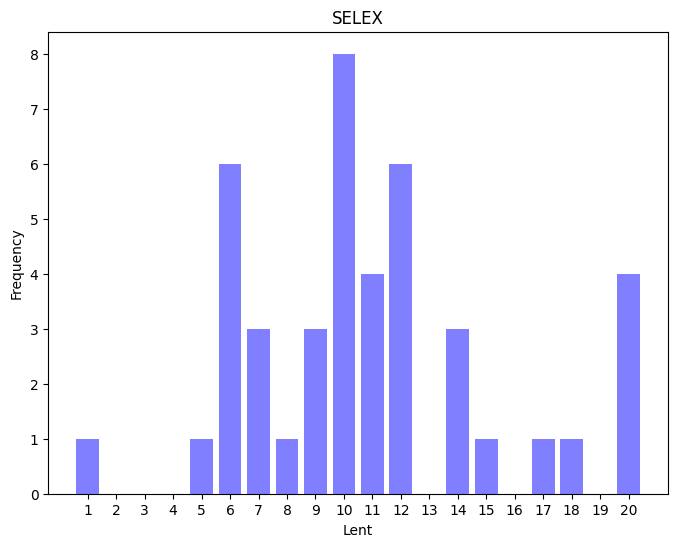

In [76]:
plt.figure(figsize=(8, 6))
selex_value_counts = pd.Series(selex_plot_data).value_counts().sort_index()
plt.bar(selex_value_counts.index, selex_value_counts.values, color='blue',alpha = 0.5)
plt.xticks(np.arange(math.floor(min(selex_value_counts.index)), math.ceil(max(selex_value_counts.index))+1, 1))
plt.xlabel('Lent')
plt.ylabel('Frequency')
plt.title('SELEX')
plt.show()

In [77]:
# ChIP-seq, ChIP-chip
df = pd.read_csv("success_download.csv")
ChIP_result = []
ChIP_plot_data = []

ChIP_seq_rows = df[df['Data type'] == 'ChIP-seq']
for id in ChIP_seq_rows['ID']:
    result = Get_lent(id)
    ChIP_result.append(result)
    ChIP_plot_data.append(result[1])

ChIP_chip_rows = df[df['Data type'] == 'ChIP-chip']
for id in ChIP_chip_rows['ID']:
    result = Get_lent(id)
    ChIP_result.append(result)
    ChIP_plot_data.append(result[1])

    
# check the correct or not
if len(ChIP_seq_rows)+len(ChIP_chip_rows) != len(ChIP_result):
    print("ERROR!!!!!!!!!!!!!!!!")
else:
    print(f"There are {len(ChIP_result)} total rows of data")

There are 250 total rows of data


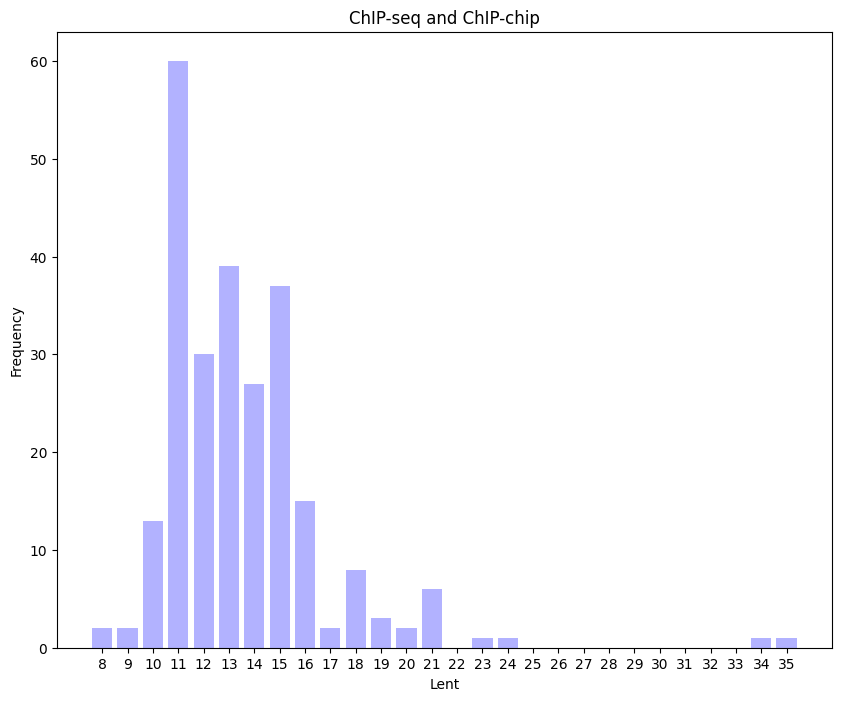

In [80]:
plt.figure(figsize=(10, 8))
CHIP_value_counts = pd.Series(ChIP_plot_data).value_counts().sort_index()
plt.bar(CHIP_value_counts.index, CHIP_value_counts.values, color='blue',alpha = 0.3)
plt.xticks(np.arange(math.floor(min(CHIP_value_counts.index)), math.ceil(max(CHIP_value_counts.index))+1, 1))
plt.xlabel('Lent')
plt.ylabel('Frequency')
plt.title('ChIP-seq and ChIP-chip')
plt.show()

In [81]:
#COMPILED, bacterial 1-hybrid, NA
df = pd.read_csv("success_download.csv")
other_result = []
other_plot_data = []

# COMPILED
COMPILED_rows = df[df['Data type'] == 'COMPILED']
for id in COMPILED_rows['ID']:
    result = Get_lent(id)
    other_result.append(result)
    other_plot_data.append(result[1])
    
# bacterial 1-hybrid
bacterial_1_hybrid_rows = df[df['Data type'] == 'bacterial 1-hybrid']
for id in bacterial_1_hybrid_rows['ID']:
    result = Get_lent(id)
    other_result.append(result)
    other_plot_data.append(result[1])
    
NA_rows = df[df['Data type'].isnull()]
for id in NA_rows['ID']:
    result = Get_lent(id)
    other_result.append(result)
    other_plot_data.append(result[1])

# check the correct or not
if len(COMPILED_rows)+len(bacterial_1_hybrid_rows)+len(NA_rows) != len(other_result):
    print("ERROR!!!!!!!!!!!!!!!!")


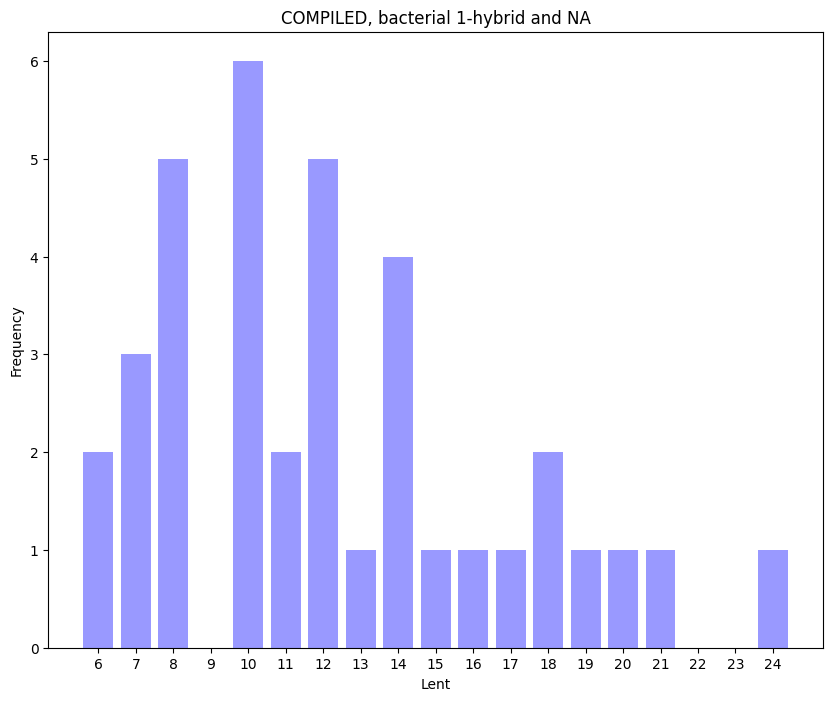

In [83]:
plt.figure(figsize=(10, 8))
other_value_counts = pd.Series(other_plot_data).value_counts().sort_index()
plt.bar(other_value_counts.index, other_value_counts.values, color='blue',alpha = 0.4)
plt.xticks(np.arange(math.floor(min(other_value_counts.index)), math.ceil(max(other_value_counts.index))+1, 1))
plt.xlabel('Lent')
plt.ylabel('Frequency')
plt.title('COMPILED, bacterial 1-hybrid and NA')
plt.show()

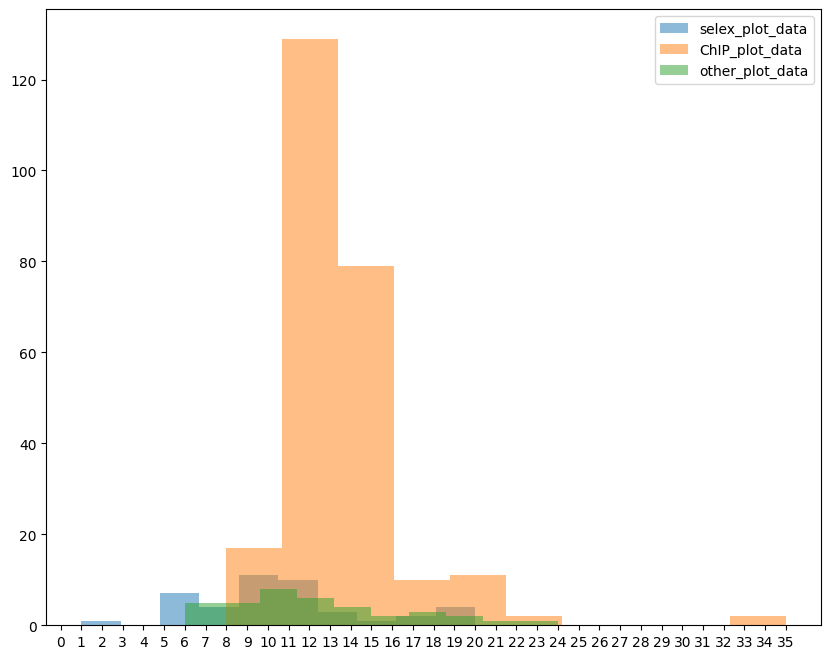

In [86]:
plt.figure(figsize=(10, 8))
plt.hist(selex_plot_data,alpha = 0.5)
plt.hist(ChIP_plot_data,alpha = 0.5)
plt.hist(other_plot_data,alpha = 0.5)
plt.legend(["selex_plot_data","ChIP_plot_data","other_plot_data"])
plt.xticks(np.arange(0, 36, 1))
plt.show()

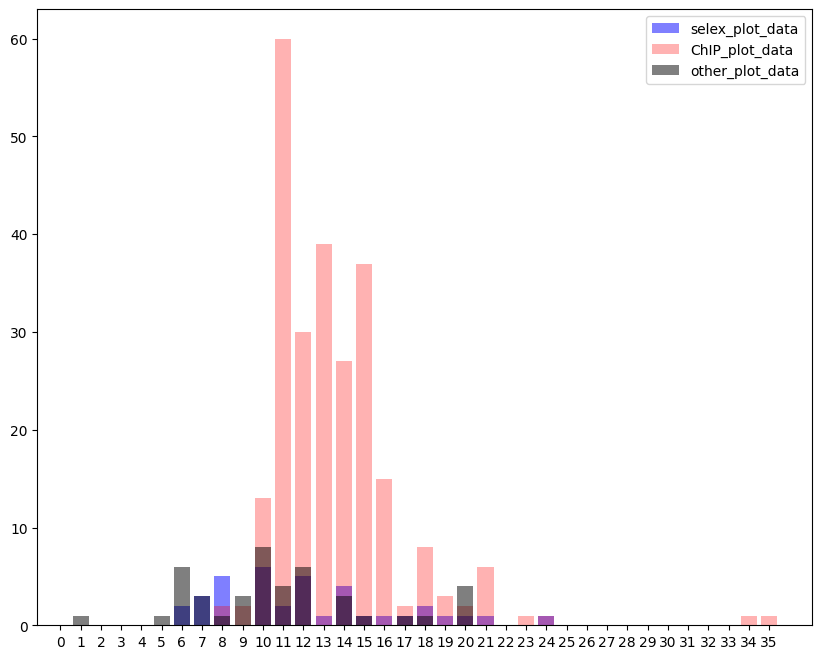

In [93]:
plt.figure(figsize=(10, 8))
plt.bar(other_value_counts.index, other_value_counts.values, color='blue',alpha = 0.5)
plt.bar(CHIP_value_counts.index, CHIP_value_counts.values, color='red',alpha = 0.3)
plt.bar(selex_value_counts.index, selex_value_counts.values, color='black',alpha = 0.5)
plt.legend(["selex_plot_data","ChIP_plot_data","other_plot_data"])
plt.xticks(np.arange(0, 36, 1))
plt.show()